In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/yys30

!git clone https://github.com/kairess/BeautyGAN

/content/drive/MyDrive/yys30
Cloning into 'BeautyGAN'...
remote: Enumerating objects: 107, done.
remote: Total 107 (delta 0), reused 0 (delta 0), pack-reused 107
Receiving objects: 100% (107/107), 13.63 MiB | 9.69 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [2]:
import  tensorflow  as  tf
print (tf.__version__) 


2.6.0


In [3]:
%tensorflow_version 1.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [4]:
!pip install tensorflow==1.15.5

     |████████████████████████████████| 110.5 MB 1.3 kB/s 
     |████████████████████████████████| 2.9 MB 37.5 MB/s 
     |████████████████████████████████| 50 kB 5.8 MB/s 
     |████████████████████████████████| 20.1 MB 1.2 MB/s 
     |████████████████████████████████| 503 kB 72.7 MB/s 
     |████████████████████████████████| 3.8 MB 15.7 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=cf0f0fbfe43107632f6b1b7e3908b630b509bf662d148db86bf3ef4bf1f3c7c0
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tens

In [1]:
import  tensorflow  as  tf
print (tf.__version__) 

1.15.5


In [3]:
import dlib # 이미지에서 얼굴을 찾는 모듈, 기우뚱한 얼굴의 수평을 맞춰주는것을 하기 위해
import matplotlib.pyplot as plt  # 이미지를 파이썬에 띄워주기 위해
import matplotlib.patches as patches
import tensorflow as tf   # 이 뷰티갠 모델을 만든이의 모델을 로드하고 사용하기 위해서
import numpy as np

In [8]:
%cd /content/drive/MyDrive/yys30/BeautyGAN

detector = dlib.get_frontal_face_detector() # 사진에서 얼굴을 찾는 함수
sp = dlib.shape_predictor('models/shape_predictor_5_face_landmarks.dat')
# 얼굴에서의 특징을 찾는 5개의 랜드마크를 찾아주기 위한 모델을 불러온다. 

/content/drive/MyDrive/yys30/BeautyGAN


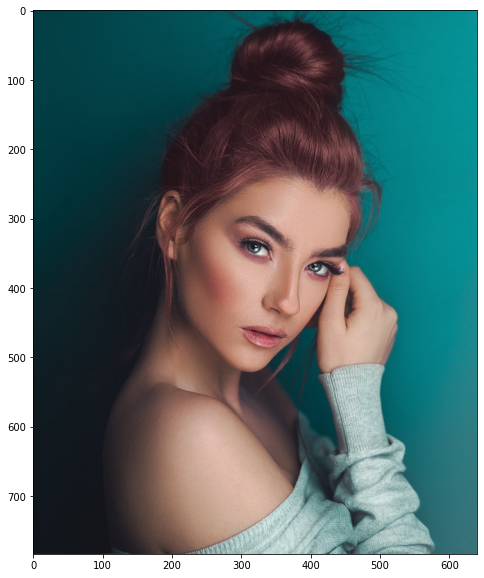

In [9]:
img = dlib.load_rgb_image('imgs/01.jpg')  # 01.jpg 를 불러옵니다

plt.figure(figsize=(16, 10))
plt.imshow(img) # 시각화 합니다.

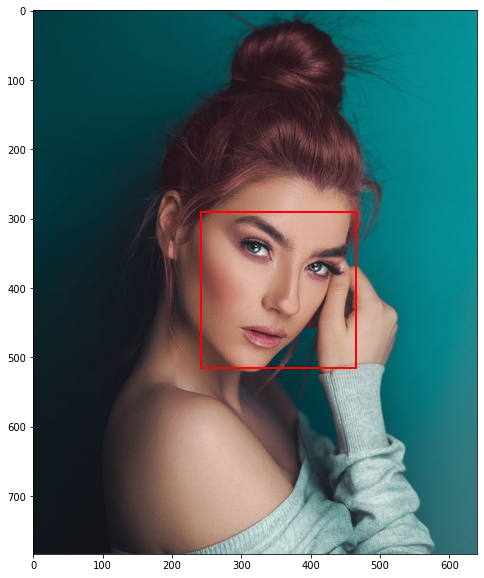

In [10]:
img_result = img.copy()  # 이미지를 copy 해서 img_result 에 넣어주고

dets = detector(img, 1)  # detector 에 img 이미지를 넣어주면 얼굴 영역들이 나온다. 

if len(dets) == 0:  # 이미지에 얼굴영역의 갯수가 0 이면 즉 얼굴을 찾지 못했으면
    print('cannot find faces!')  # 못찾았다고 프린트 하고 

fig, ax = plt.subplots(1, figsize=(16, 10)) # 그래프 영역을 잡아주고

for det in dets: # 얼굴을 찾게 되면 for 문이 돌게 되는데 
    x, y, w, h = det.left(), det.top(), det.width(), det.height()
    # dets 안에 dlib 의 ractangle 오브젝트가 있어서 얼굴을 네모 박스로
    # 찾아서 그 사각형의 꼭지점 4개를 나타낸다. 

    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
    # (x,y )는 찾은 얼굴의 x 좌표와 y 좌표에 w(너비), h(높이)로 선 색깔을 빨간색으로 
    # 선의 두께는 2로 하고 네모를 채우지 않는(none) 상태로

    ax.add_patch(rect) # 사각형을 그려라 

ax.imshow(img_result)

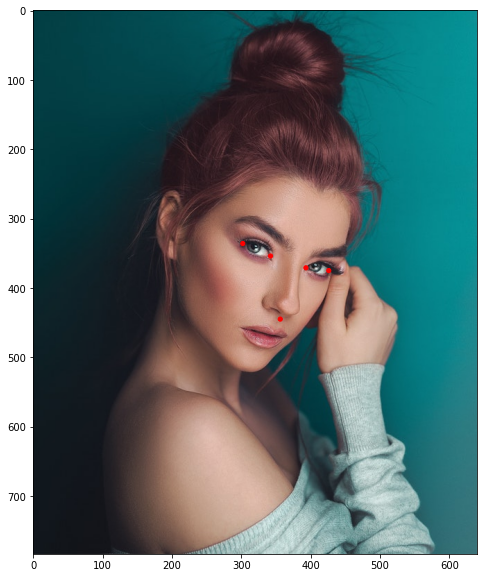

In [11]:
fig, ax = plt.subplots(1, figsize=(16, 10)) # 그래프를 그리기 위한 영역 잡아주고

objs = dlib.full_object_detections()  # dlib의 full_object_detections 함수는 나중에 얼굴을
                                      # 똑바로 돌릴 때 사용합니다. 
for detection in dets:  # dets 의 얼굴들을 하나씩 불러와서 
    s = sp(img, detection)  # img 이미지의 5개의 랜드 마크를 찾아서 
    objs.append(s) # 얼굴을 똑바로 돌려주는 objs 에 입력합니다. (5개의 랜드마크)
    
    for point in s.parts(): # 그럼 for 문이 5번이 돌면서 
        circle = patches.Circle((point.x, point.y), radius=3, edgecolor='r', facecolor='r') # 원을 그려줍니다.
        ax.add_patch(circle) # 그래서 이미지에 랜드마크를 그립니다. 

ax.imshow(img_result) # 그러면 왼쪽눈의 양끝, 오른쪽 눈의 양끝, 그리고 코에 랜드마크가 찍힙니다.

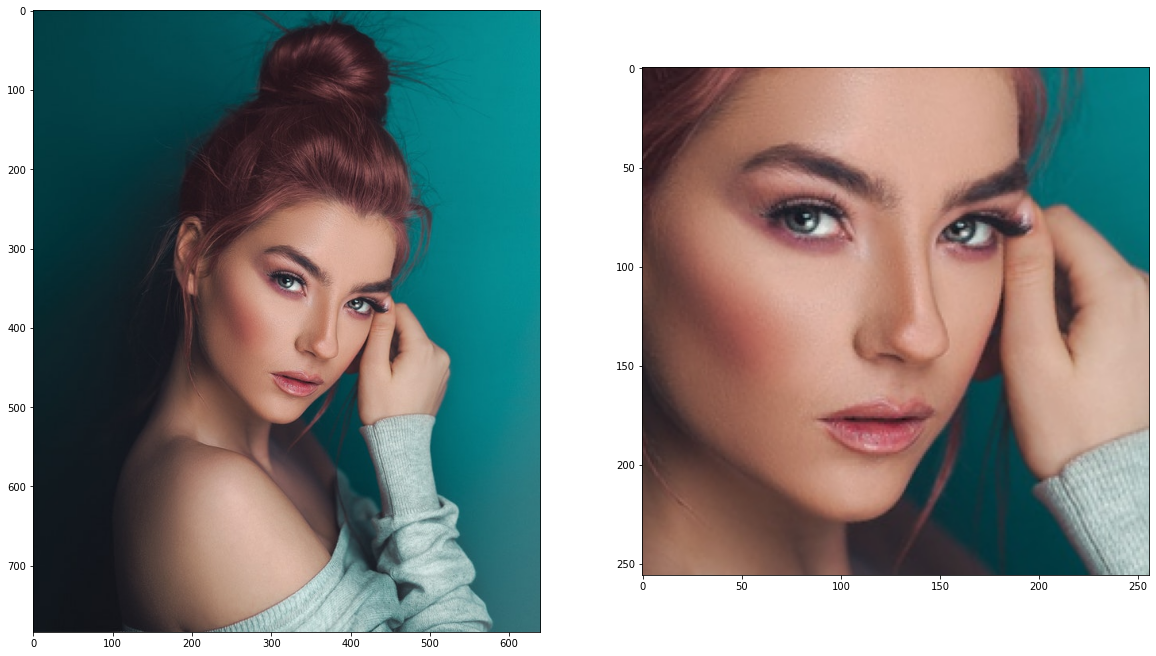

In [12]:
faces = dlib.get_face_chips(img, objs, size=256, padding=0.3)
# 얼굴을 수평으로 회전하여 얼굴 부분만 자른 이미지를 반환하는 함수에 입력값으로
# 원본이미지(img) 를 넣어주고 아까 만들었던 full object detections 를 통해서 만든
#objs 를 넣어주고 size 는 얼굴을 잘라낼 사이즈를 정해줍니다. 
# padding 은 얼굴을 이미지에 꽉채울지 여백을 둘지를 정해주는것 입니다.  

fig, axes = plt.subplots(1, len(faces)+1, figsize=(20, 16)) # 얼굴의 갯수만큼 plot 을 그릴건데

axes[0].imshow(img)  # 원본 이미지를 한번 찍어주고

for i, face in enumerate(faces): # 얼굴 이미지들이 여러개면 그 여러개를 하나씩 시각화합니다. 
    axes[i+1].imshow(face)

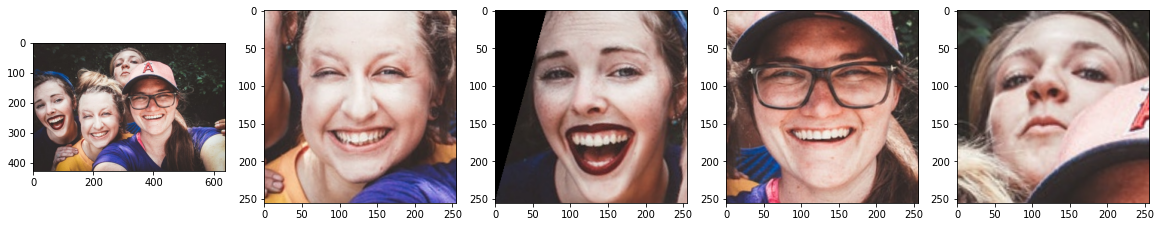

In [13]:
def align_faces(img):   # 위의 코드들을 함수화 해서 이미지를 넣고 얼굴을 찾아 수평으로 맞춰주는 함수
    dets = detector(img, 1)
    
    objs = dlib.full_object_detections()

    for detection in dets:
        s = sp(img, detection)
        objs.append(s)
        
    faces = dlib.get_face_chips(img, objs, size=256, padding=0.35)
    
    return faces

# test
test_img = dlib.load_rgb_image('imgs/02.jpg')  # 얼굴이 많은 다른 사진을 불러와서

test_faces = align_faces(test_img)  # 얼굴을 찾아서 얼굴의 수평을 맞춰주는 함수에 넣어서

fig, axes = plt.subplots(1, len(test_faces)+1, figsize=(20, 16))  # 그 얼굴의 갯수 만큼 영역을 잡고
axes[0].imshow(test_img)  # 원본 이미지 한번 찍어주고 

for i, face in enumerate(test_faces): # 얼굴들을 불러와서 시각화 
    axes[i+1].imshow(face)

In [14]:
%cd /content/drive/MyDrive/yys3/BeautyGAN


sess = tf.Session()  # 텐써 플로우 1.0 은 2.0 과는 다르게 텐써플로우 그래프르 그리기 위한 세션을 시작하겠다.
sess.run(tf.global_variables_initializer())  # 텐써 그래프를 초기화 해줍니다. 

saver = tf.train.import_meta_graph('models/model.meta')  # 모델을 불러옵니다. 
saver.restore(sess, tf.train.latest_checkpoint('models')) # 가중치들도 불러옵니다. 
graph = tf.get_default_graph()  # 모델과 가중치를  텐써플로우 그래프에 저장합니다. 

X = graph.get_tensor_by_name('X:0') # source  X 는 노메이크업 이미지이고
Y = graph.get_tensor_by_name('Y:0') # reference  Y 는 따라할 메이크업 이미지이고
Xs = graph.get_tensor_by_name('generator/xs:0') # output 은 결과 이미지 입니다. 

/content/drive/MyDrive/yys3/BeautyGAN
INFO:tensorflow:Restoring parameters from models/model


In [15]:
def preprocess(img):  # 전처리하는 함수인데 0~255 픽셀 이미지가 -1~ +1 사이의 값의 float 형태로 변경해주는 함수
    return img.astype(np.float32) / 127.5 - 1.

def postprocess(img): # 후처리하는 함수로 전처리를 반대로 해주는 함수 입니다. 
    return ((img + 1.) * 127.5).astype(np.uint8)

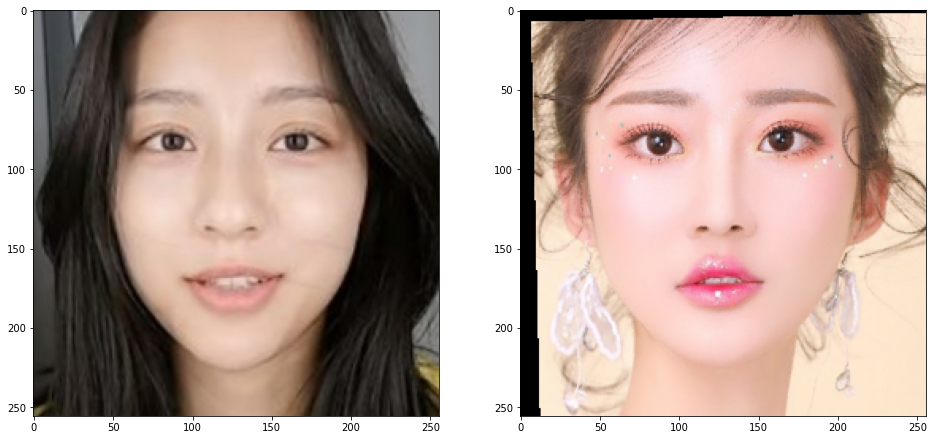

In [16]:
img1 = dlib.load_rgb_image('imgs/17.jpg') # 원본 이미지를 가져오고
img1_faces = align_faces(img1)  # 수평을 맞춰주고 

img2 = dlib.load_rgb_image('imgs/makeup/vFG56.png')  # 메이크업 이미지를 불러오고 
img2_faces = align_faces(img2)  # 수평을 맞춰주고 

fig, axes = plt.subplots(1, 2, figsize=(16, 10))  # 그래프 영역 잡은 후에
axes[0].imshow(img1_faces[0])  # 원본 이미지 시각화
axes[1].imshow(img2_faces[0])  # 메이크업한 이미지 시각화

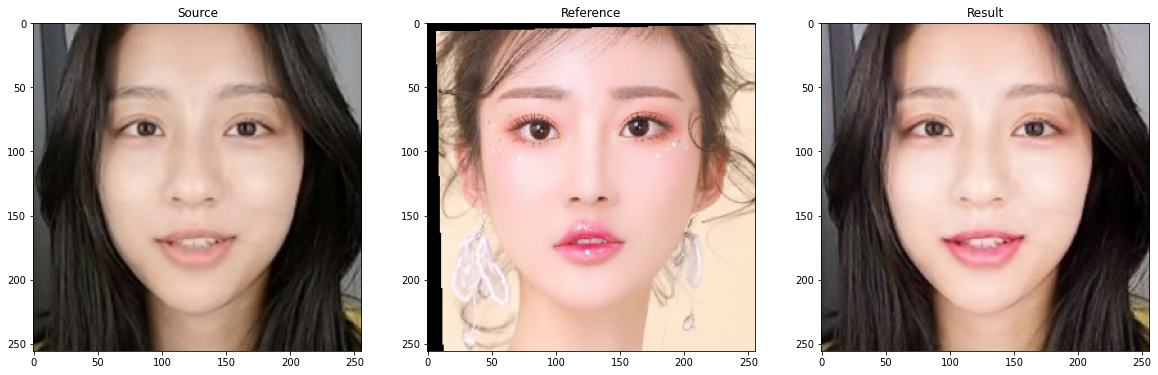

In [17]:
src_img = img1_faces[0]  # 원본이미지를 불러오고
ref_img = img2_faces[0]  # 메이크업한 이미지를 불러와서 

X_img = preprocess(src_img)  # 전처리를 하고 
X_img = np.expand_dims(X_img, axis=0) #(256, 256, 3) ---> (1, 256, 256, 3) 으로 변경해줘야 텐써플로우 cnn넣을수 
                                    # 있습니다. 

Y_img = preprocess(ref_img)   # 메이크업 이미지도 마찬가지로 전처리하고 
Y_img = np.expand_dims(Y_img, axis=0) # 차원을 늘려줍니다. 

output = sess.run(Xs, feed_dict={  # Xs output 변수에 결과이미지를 담을건데 신경망에 데이터를 넣어주는데
    X: X_img,    # 원본 이미지 넣어주고
    Y: Y_img     # 메이크업한 이미지를 넣어줍니다. 
})

output_img = postprocess(output[0])  # output 이미지를 시각화 할수 있도록 후처리합니다. 

fig, axes = plt.subplots(1, 3, figsize=(20, 10))  # 시각화 하기 위한 영역잡아주고
axes[0].set_title('Source')
axes[0].imshow(src_img)  # 원본 이미지 와
axes[1].set_title('Reference')
axes[1].imshow(ref_img) # 메이크업 한 이미지와
axes[2].set_title('Result')
axes[2].imshow(output_img) # 결과 이미지를 시각화 합니다. 